In [133]:
import pandas as pd
import numpy as np
from IPython.display import display
from matplotlib import pyplot as plt
import sklearn as sk

Let's merge together all the dataset we scrapped!

- Bike
- Cars
- Weather
- Pollution
- Pollution in other cities

Then add days columns


In [118]:
folder = "./holy results/"
bike = pd.read_csv(folder+'bike_traffic_paris_2016_2022.csv',index_col='date')
weather = pd.read_csv(folder+'weather_2014_2023.csv')
cars = pd.read_csv(folder+'daily_traffic_Paris_2015_2023.csv',index_col='date')
pollution = pd.read_csv(folder+'daily_NO2_2013_2023.csv')
pollution['date'] = pollution['date'].str[:10]
pollution = pollution.set_index('date')
weather['date'] = pd.to_datetime(weather['date'],format='%m/%d/%Y')
weather['date'] = weather['date'].dt.strftime('%Y-%m-%d')
weather.set_index('date',inplace=True)
datasets = [pollution,cars,weather,bike]

In [119]:
for dataset in datasets:
    display(dataset)

,y
date,
2013-01-01,24.304348
2013-01-02,56.395833
2013-01-03,41.829167
2013-01-04,42.837500
2013-01-05,23.920833
...,...
2023-04-30,22.095833
2023-05-01,27.700000
2023-05-02,21.825000


,q,k,etat_trafic
date,,,
2015-01-01,1134.190661,4.762716,1.039736
2015-01-02,1230.138150,5.628853,1.087452
2015-01-03,1175.388653,5.535600,1.070029
2015-01-04,1166.337156,4.826594,1.042736
2015-01-05,1333.918753,5.931412,1.098568
...,...,...,...
2023-04-18,1167.533997,8.930174,1.195000
2023-04-19,1251.227805,9.466110,1.212558
2023-04-20,1304.298118,9.874046,1.225746


,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C
date,,,,,,,,,,,,,,,,,,,,
2014-01-01,9,4,31,4,9,9,4.8,96,7.875,1011,77.500,9,7,0,0.0,2,5.1,17:04:00,8:44:00,5
2014-01-02,10,7,23,9,10,8,4.9,92,9.500,1006,57.125,10,8,4,0.0,2,8.6,17:05:00,8:44:00,9
2014-01-03,12,7,33,9,12,9,2.4,94,9.875,1011,50.000,12,9,6,0.0,4,6.9,17:07:00,8:44:00,8
2014-01-04,11,6,25,6,11,9,1.0,92,9.875,1011,63.125,11,7,3,0.0,3,6.9,17:08:00,8:44:00,7
2014-01-05,7,3,18,3,7,7,0.4,93,9.000,1010,43.000,7,6,-1,0.0,3,8.7,17:09:00,8:43:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,10,5,13,6,9,10,0.0,60,10.000,1028,63.500,10,0,4,0.0,2,9.0,20:13:00,7:40:00,6
2023-03-28,13,3,17,3,9,12,0.0,65,10.000,1029,33.750,13,0,0,0.0,3,11.6,20:15:00,7:38:00,4
2023-03-29,20,9,22,9,16,18,0.0,67,10.000,1019,44.875,20,10,7,0.0,4,11.6,20:16:00,7:36:00,10


,bike
date,
2016-01-01,356.250000
2016-01-02,444.843750
2016-01-03,236.562500
2016-01-04,888.020833
2016-01-05,870.104167
...,...
2022-12-27,520.223438
2022-12-28,460.121977
2022-12-29,586.222953


In [120]:
all_datasets = pollution
for i in range(1,len(datasets)):  
    all_datasets = pd.merge(all_datasets, datasets[i], left_index=True, right_index=True, how='outer')

In [121]:
all_datasets.tail()
all_datasets.to_csv('project_dataset.csv')

In [122]:
all_datasets = all_datasets.reset_index()
all_datasets['day'] = all_datasets['date'].str[8:]
all_datasets['month'] = all_datasets['date'].str[5:7]
all_datasets['year'] = all_datasets['date'].str[:4]
all_datasets['date'] = pd.to_datetime(all_datasets['date'])
all_datasets['weekday'] = all_datasets['date'].dt.dayofweek
all_datasets = all_datasets.set_index('date')
all_datasets

,y,q,k,etat_trafic,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,...,UV_INDEX,SUNHOUR,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C,bike,day,month,year,weekday
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,24.304348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,01,01,2013,1
2013-01-02,56.395833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,02,01,2013,2
2013-01-03,41.829167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,03,01,2013,3
2013-01-04,42.837500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04,01,2013,4
2013-01-05,23.920833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,05,01,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,22.095833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,04,2023,6
2023-05-01,27.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,01,05,2023,0
2023-05-02,21.825000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,02,05,2023,1


In [123]:
all_datasets.to_csv('project_dataset.csv')

In [124]:
all_datasets = all_datasets.reset_index()

In [125]:
all_datasets['date'] = pd.to_datetime(all_datasets['date'])

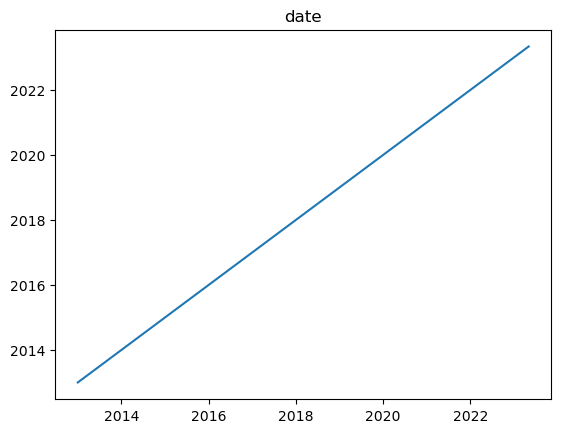

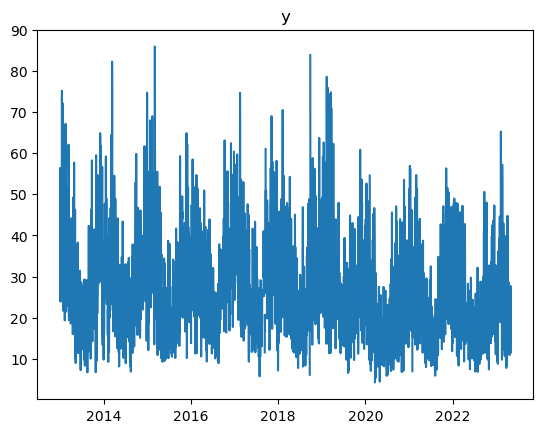

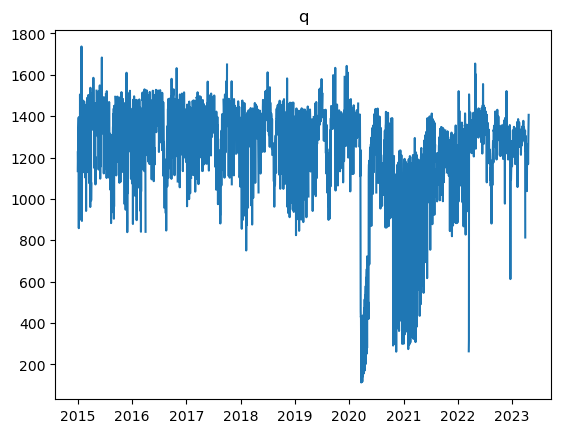

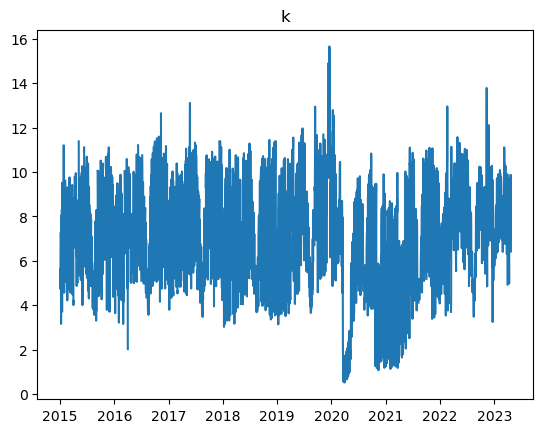

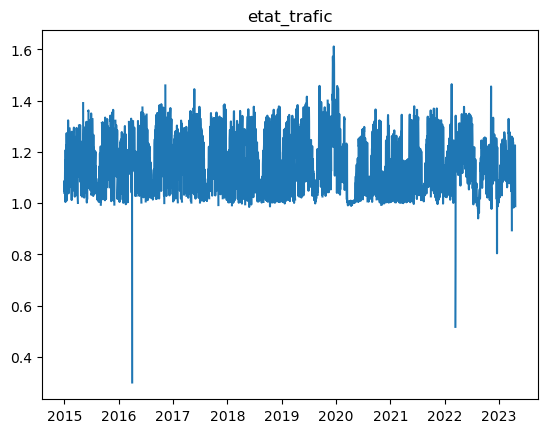

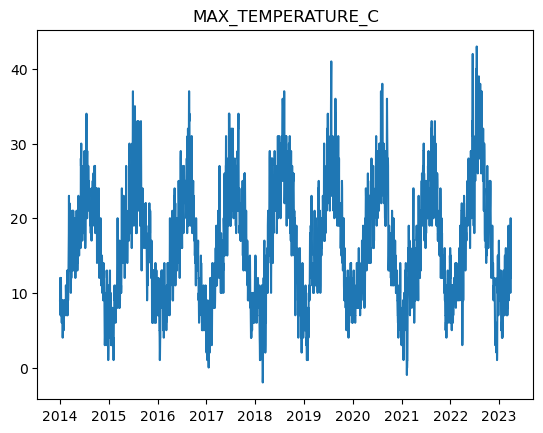

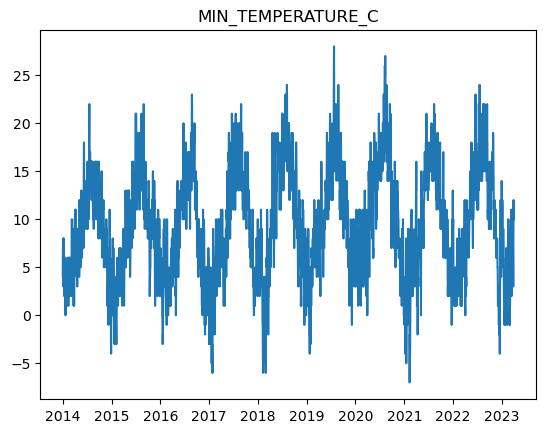

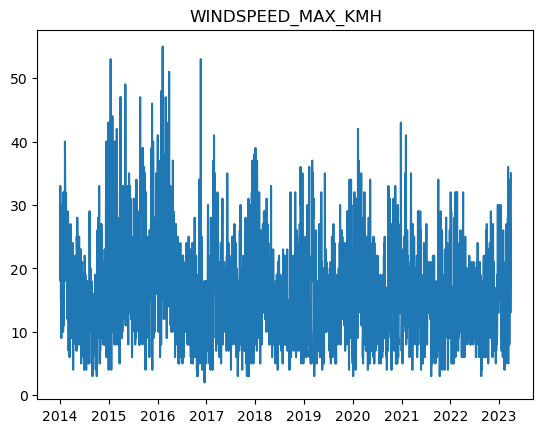

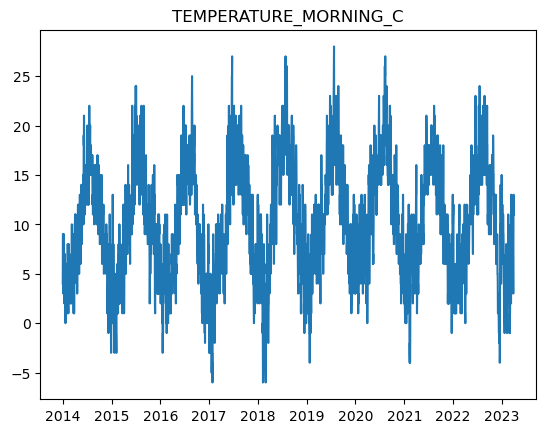

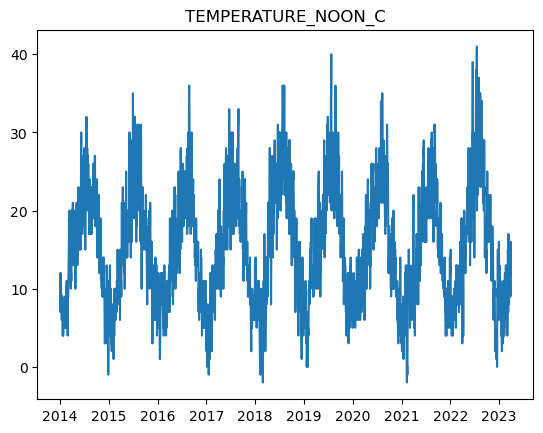

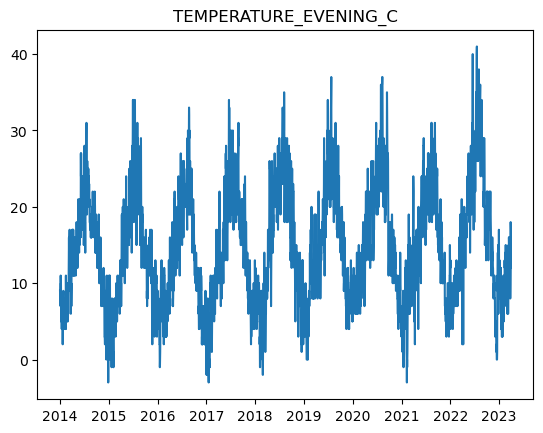

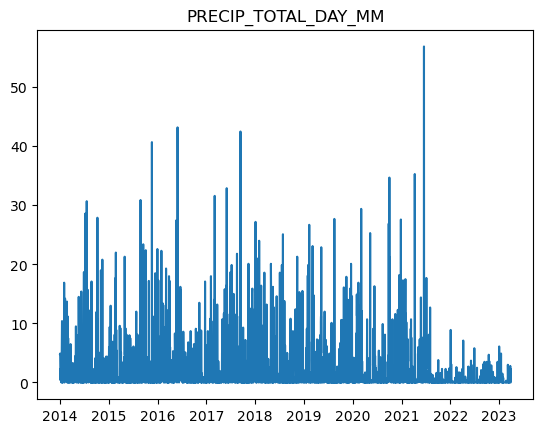

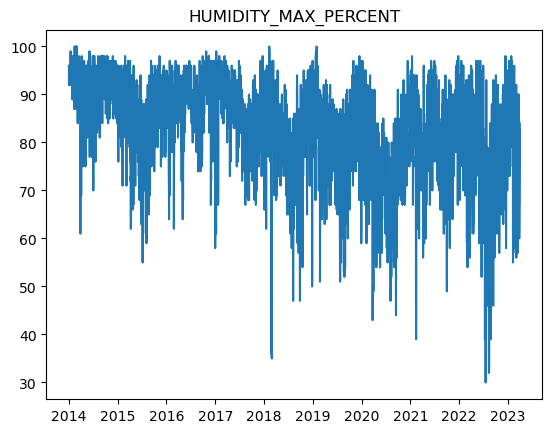

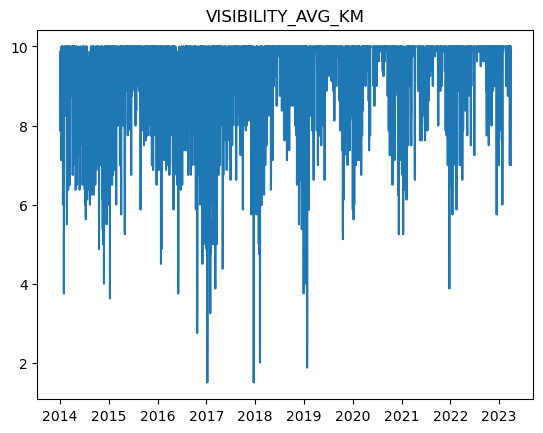

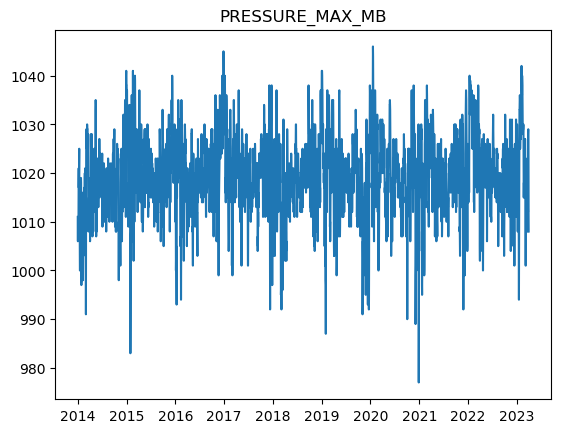

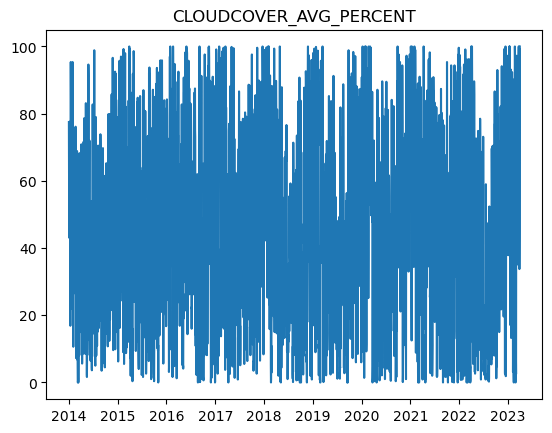

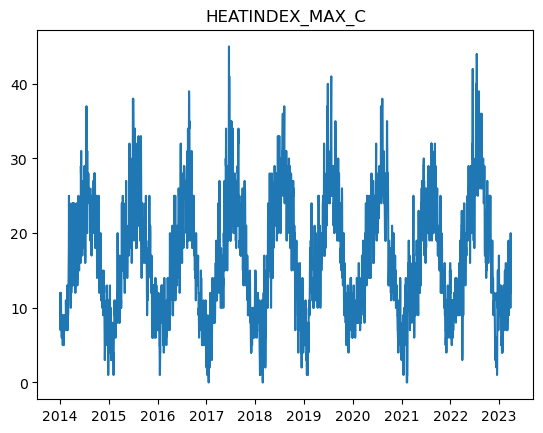

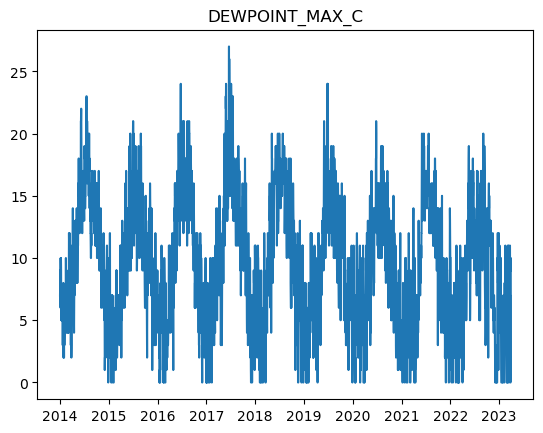

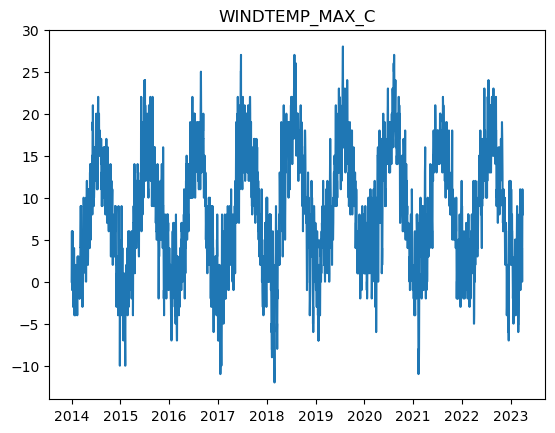

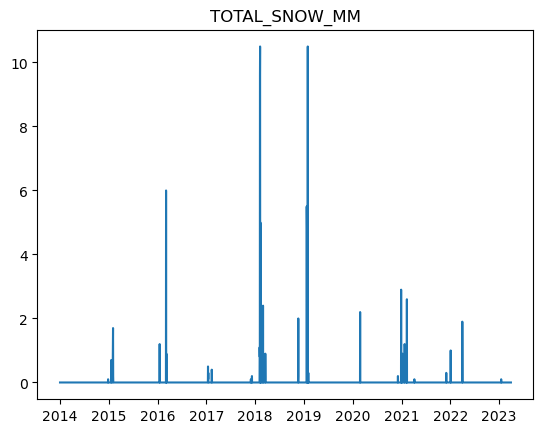

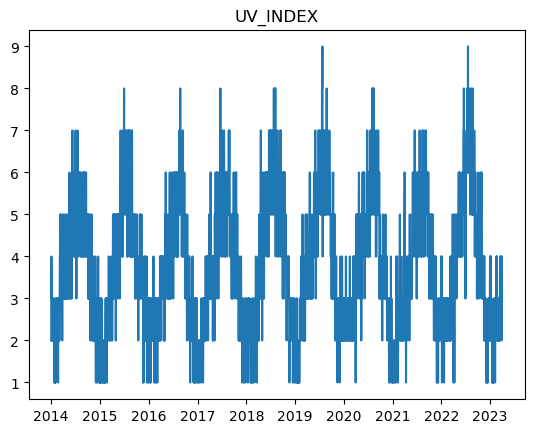

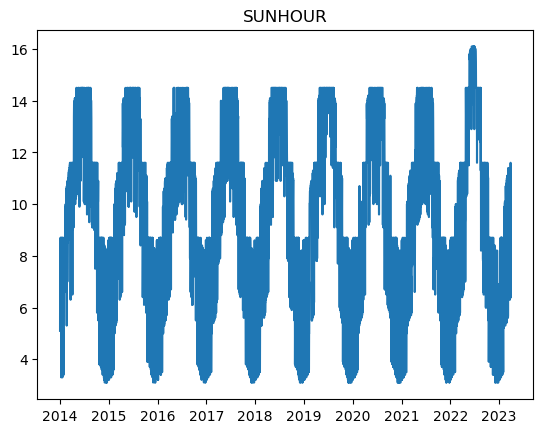

no plot for SUNSET
no plot for SUNRISE


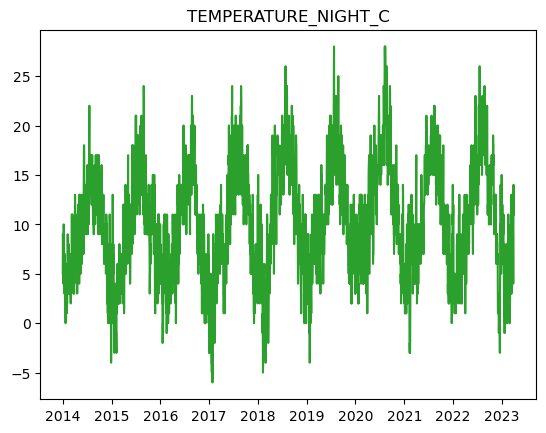

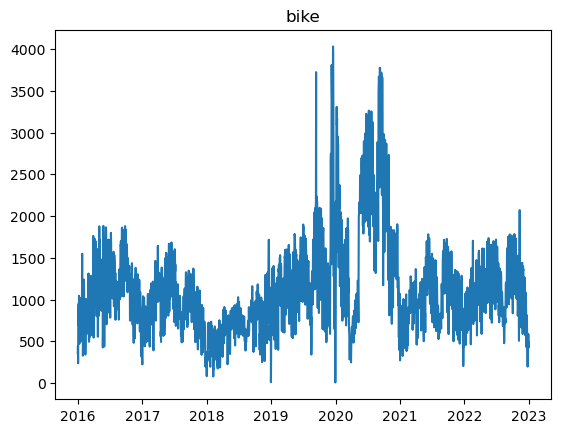

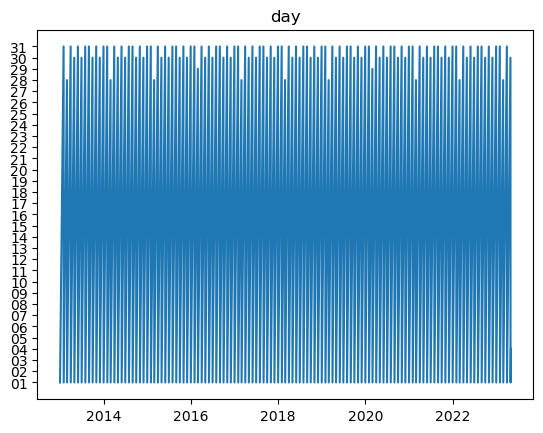

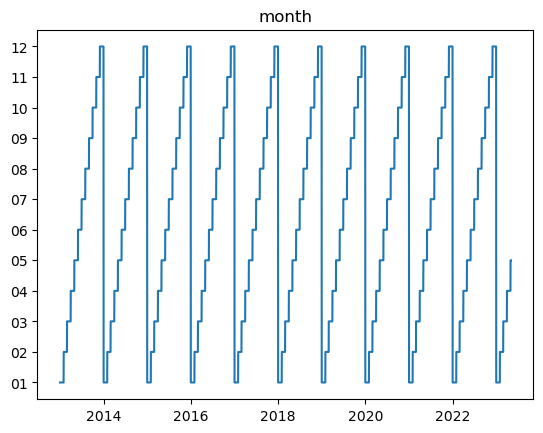

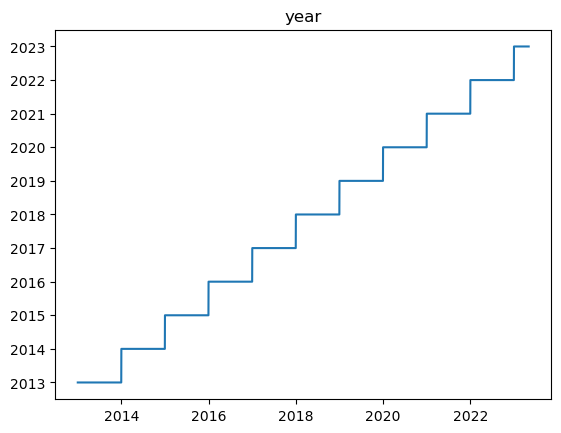

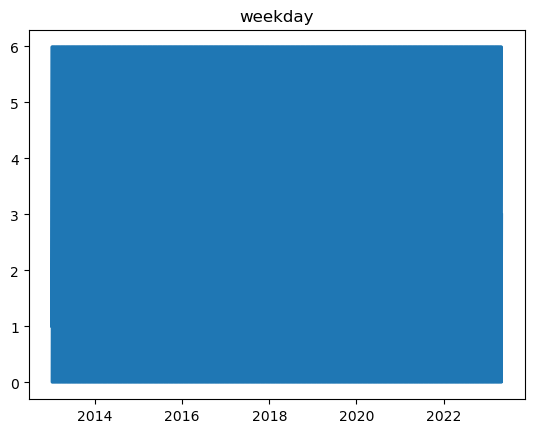

In [132]:
for col in all_datasets.columns:
    try:
        plt.plot(all_datasets['date'],all_datasets[col])
        plt.title(col)
        plt.show()
    except:
        print('no plot for',col)

In [135]:
all_datasets.set_index('date',inplace=True)
all_datasets

,y,q,k,etat_trafic,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,...,UV_INDEX,SUNHOUR,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C,bike,day,month,year,weekday
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,24.304348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,01,01,2013,1
2013-01-02,56.395833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,02,01,2013,2
2013-01-03,41.829167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,03,01,2013,3
2013-01-04,42.837500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,04,01,2013,4
2013-01-05,23.920833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,05,01,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,22.095833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,04,2023,6
2023-05-01,27.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,01,05,2023,0
2023-05-02,21.825000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,02,05,2023,1


In [147]:
#all_datasets = all_datasets.drop(['SUNSET','SUNRISE','day','month','year'],axis=1)
all_datasets = all_datasets.drop(['day','month','year'],axis=1)

In [149]:
daily_means = all_datasets.groupby(all_datasets.index.strftime('-%m-%d')).mean()
# Subtract the daily mean from each row in the DataFrame
all_datasets_avg = all_datasets.sub(daily_means.loc[all_datasets.index.strftime('-%m-%d')].values)
all_datasets_avg

,y,q,k,etat_trafic,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,TEMPERATURE_NIGHT_C,bike,weekday
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,-0.831275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.090909
2013-01-02,22.942045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.818182
2013-01-03,14.124432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.181818
2013-01-04,12.676023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.090909
2013-01-05,-8.640993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,-1.140701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.727273
2023-05-01,8.761742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.000000
2023-05-02,-1.889797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.727273


In [155]:
all_datasets_avg.reset_index(inplace=True)
all_datasets_avg['date'] = pd.to_datetime(all_datasets_avg['date'])
all_datasets_avg

,level_0,index,date,y,q,k,etat_trafic,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,TEMPERATURE_NIGHT_C,bike,weekday
0,0,0,2013-01-01,-0.831275,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.090909
1,1,1,2013-01-02,22.942045,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.818182
2,2,2,2013-01-03,14.124432,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.181818
3,3,3,2013-01-04,12.676023,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.090909
4,4,4,2013-01-05,-8.640993,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,3771,3771,2023-04-30,-1.140701,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.727273
3772,3772,3772,2023-05-01,8.761742,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.000000
3773,3773,3773,2023-05-02,-1.889797,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.727273
3774,3774,3774,2023-05-03,-7.518124,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.090909


In [156]:
all_datasets_avg = all_datasets_avg.drop(['level_0','index'],axis=1)
all_datasets_avg

,date,y,q,k,etat_trafic,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,...,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,TEMPERATURE_NIGHT_C,bike,weekday
0,2013-01-01,-0.831275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.090909
1,2013-01-02,22.942045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.818182
2,2013-01-03,14.124432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.181818
3,2013-01-04,12.676023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.090909
4,2013-01-05,-8.640993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3771,2023-04-30,-1.140701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.727273
3772,2023-05-01,8.761742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.000000
3773,2023-05-02,-1.889797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.727273
3774,2023-05-03,-7.518124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.090909


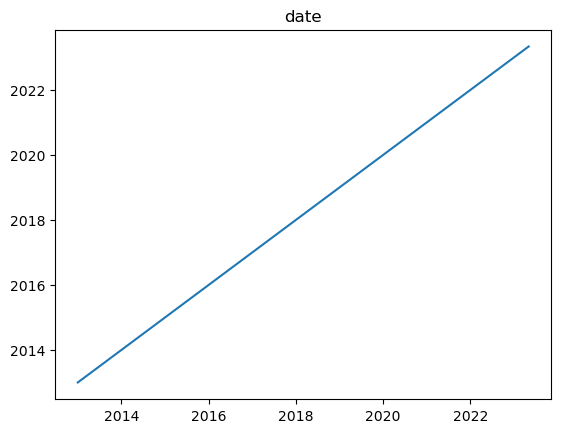

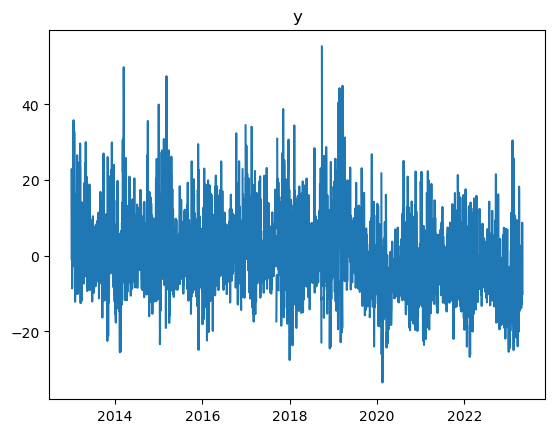

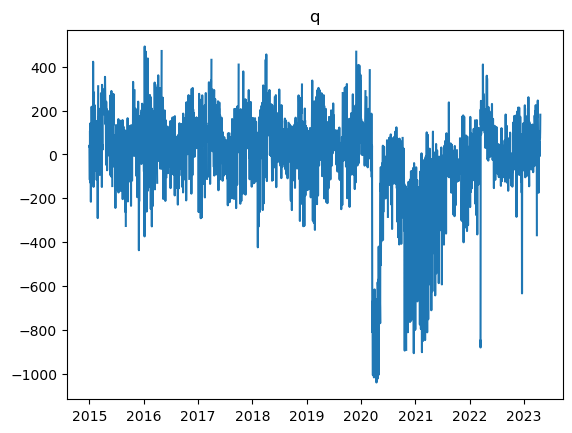

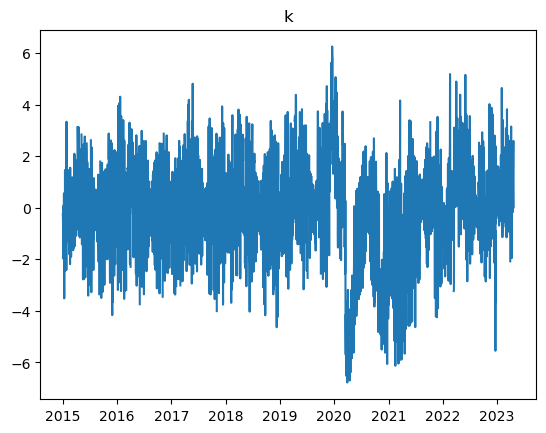

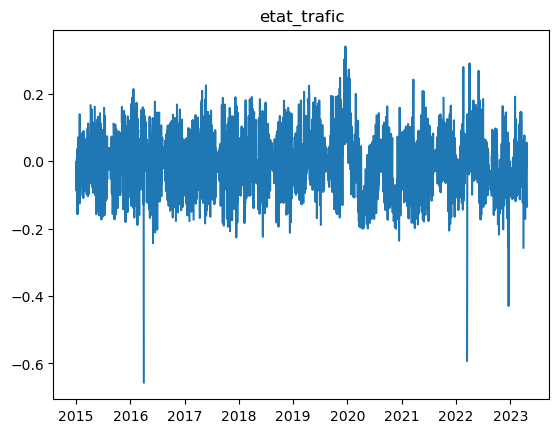

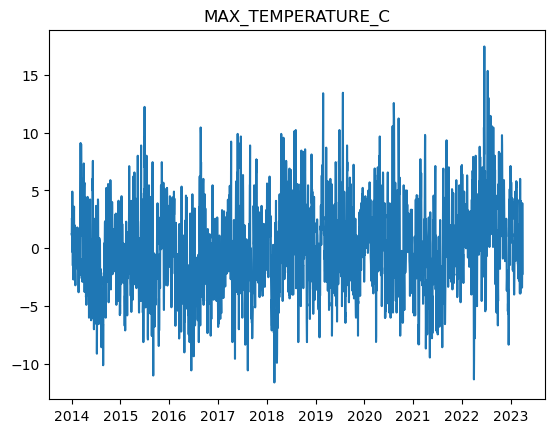

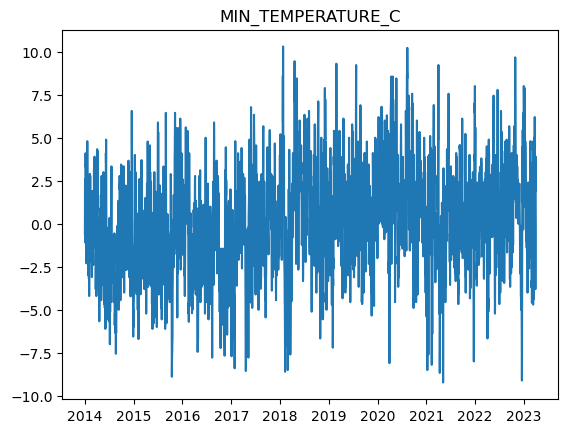

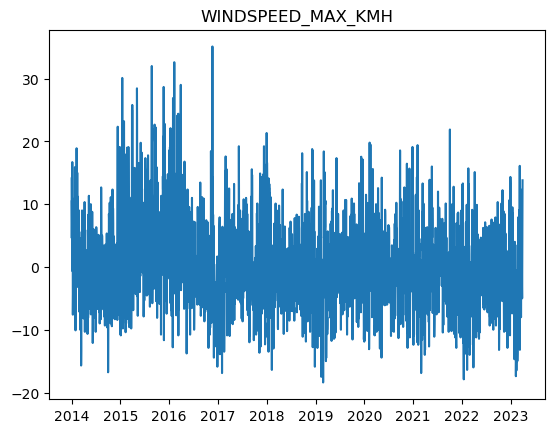

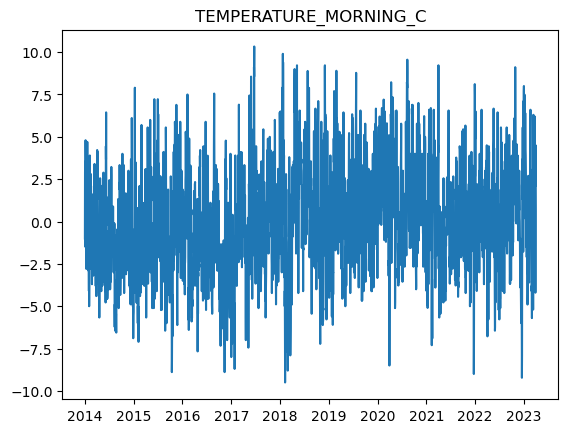

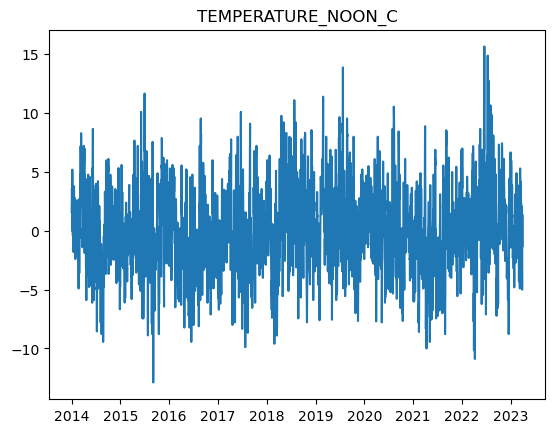

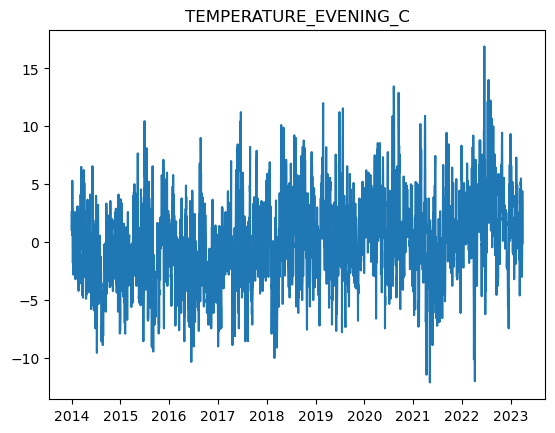

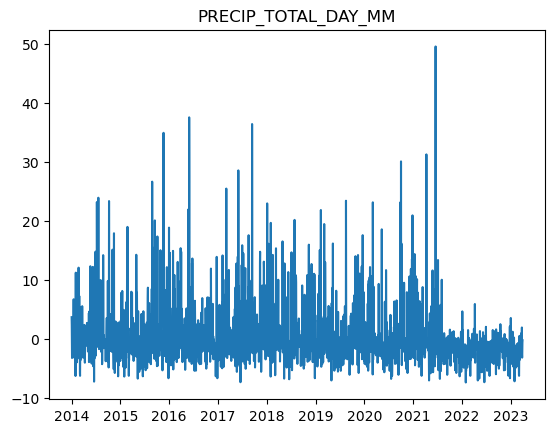

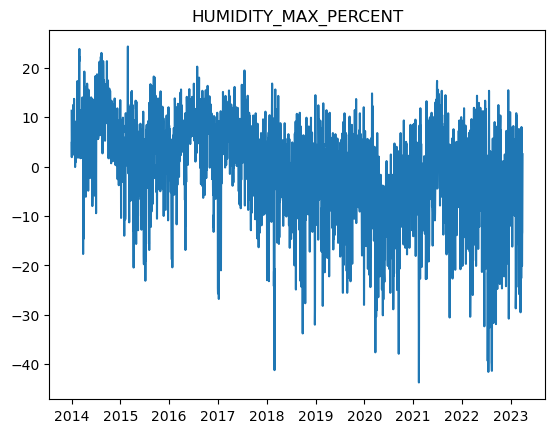

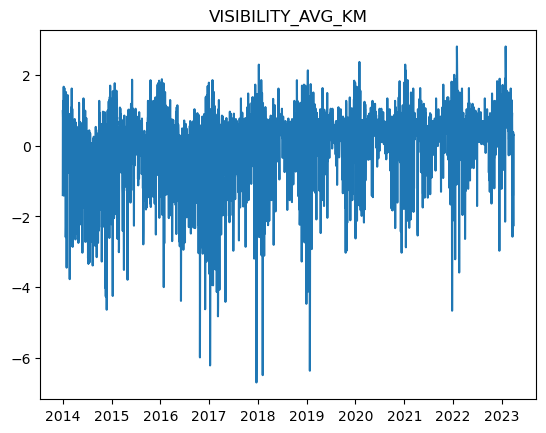

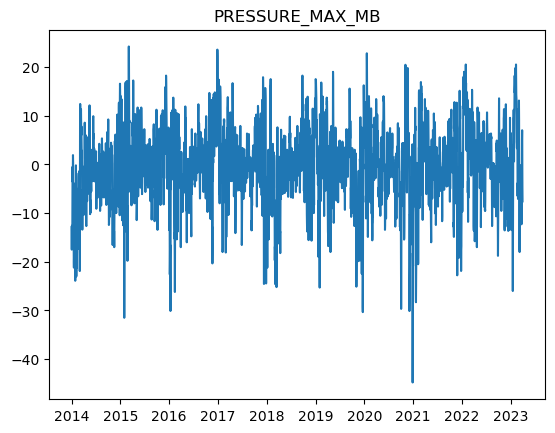

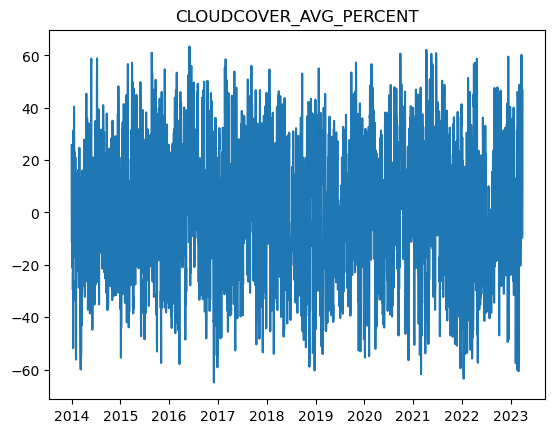

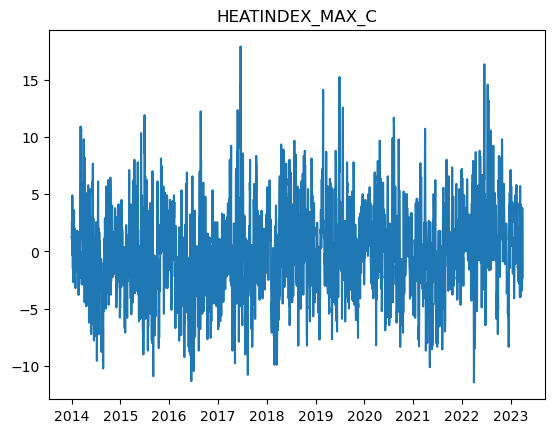

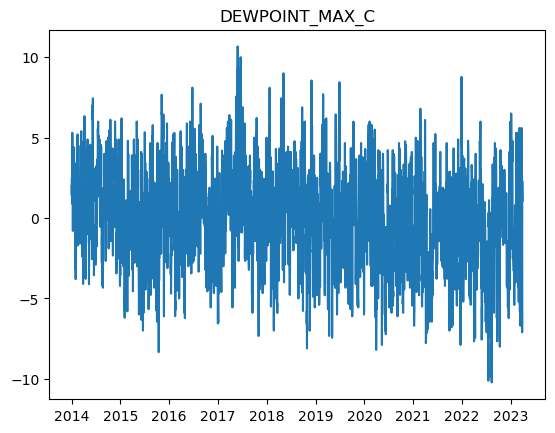

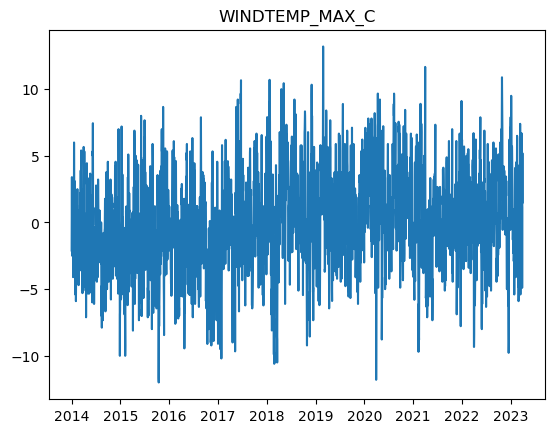

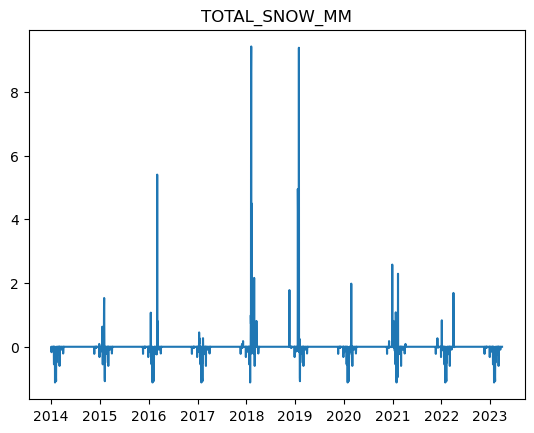

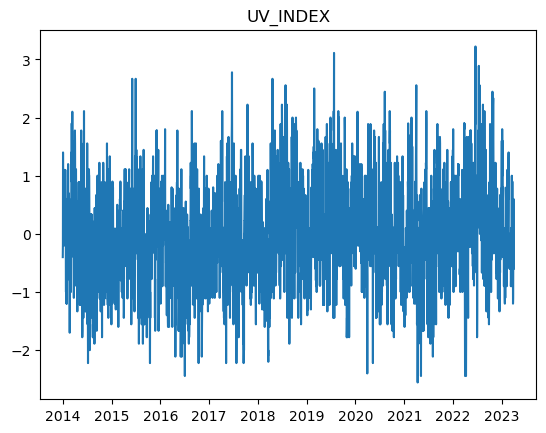

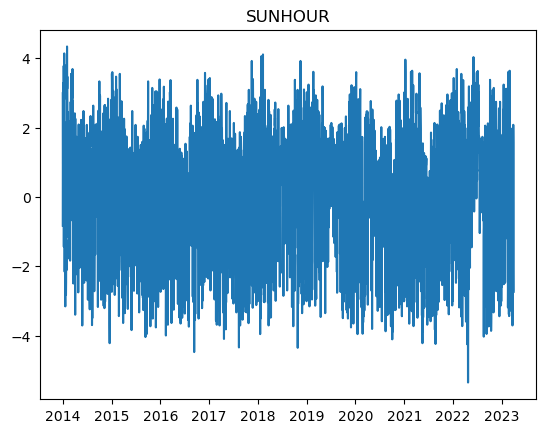

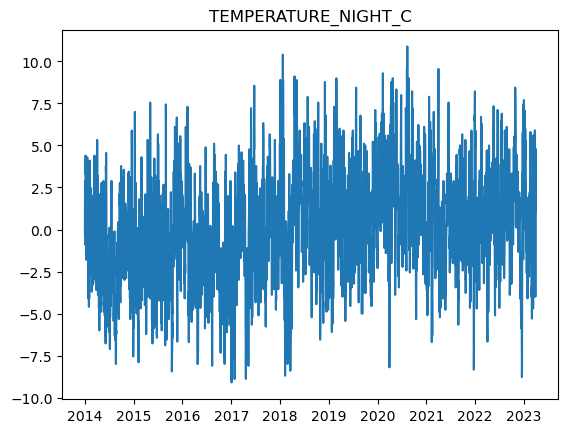

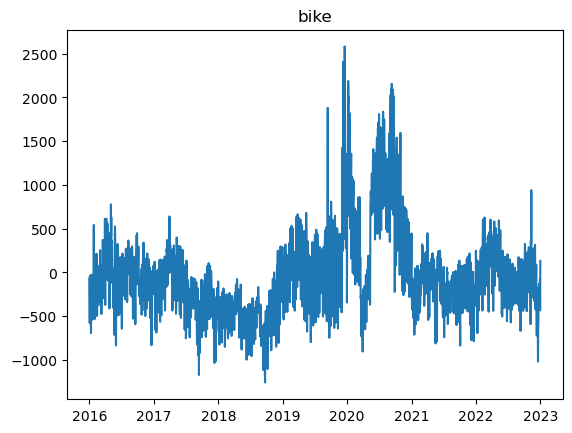

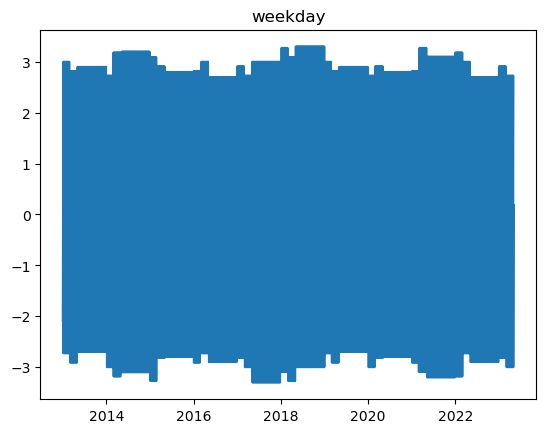

In [161]:
for col in all_datasets_avg.columns:
    try:
        plt.plot(all_datasets_avg['date'],all_datasets_avg[col])
        plt.title(col)
        plt.show()
    except:
        print('no plot for',col)